# 0. Exploratory Data Analysis (EDA) Planning

### Questions
Before building any predictive models, it is essential to **understand the dataset** by answering the following key questions:  

1. What is the distribution of the data?  
2. How do different features affect the target variable (**house price**)?  
3. How are the features correlated with one another?  
4. Where are these properties located?  
   - Since prediction depends heavily on **location**, the features `longitude (long)` and `latitude (lat)` are crucial.  


### EDA Methods
To address these questions and extract insights, the following methods will be applied:  

1. **Univariate Analysis** - Study the distribution of individual features.  
2. **Bivariate Analysis** - Explore the relationship between features and the target variable.  
3. **Correlation Matrix** - Quantify correlations between features.  
4. **Geographical Distribution** - Visualize properties on a map using `long` and `lat`. 

# 1. Univariate Analysis 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data/dataset_cleaned.csv')

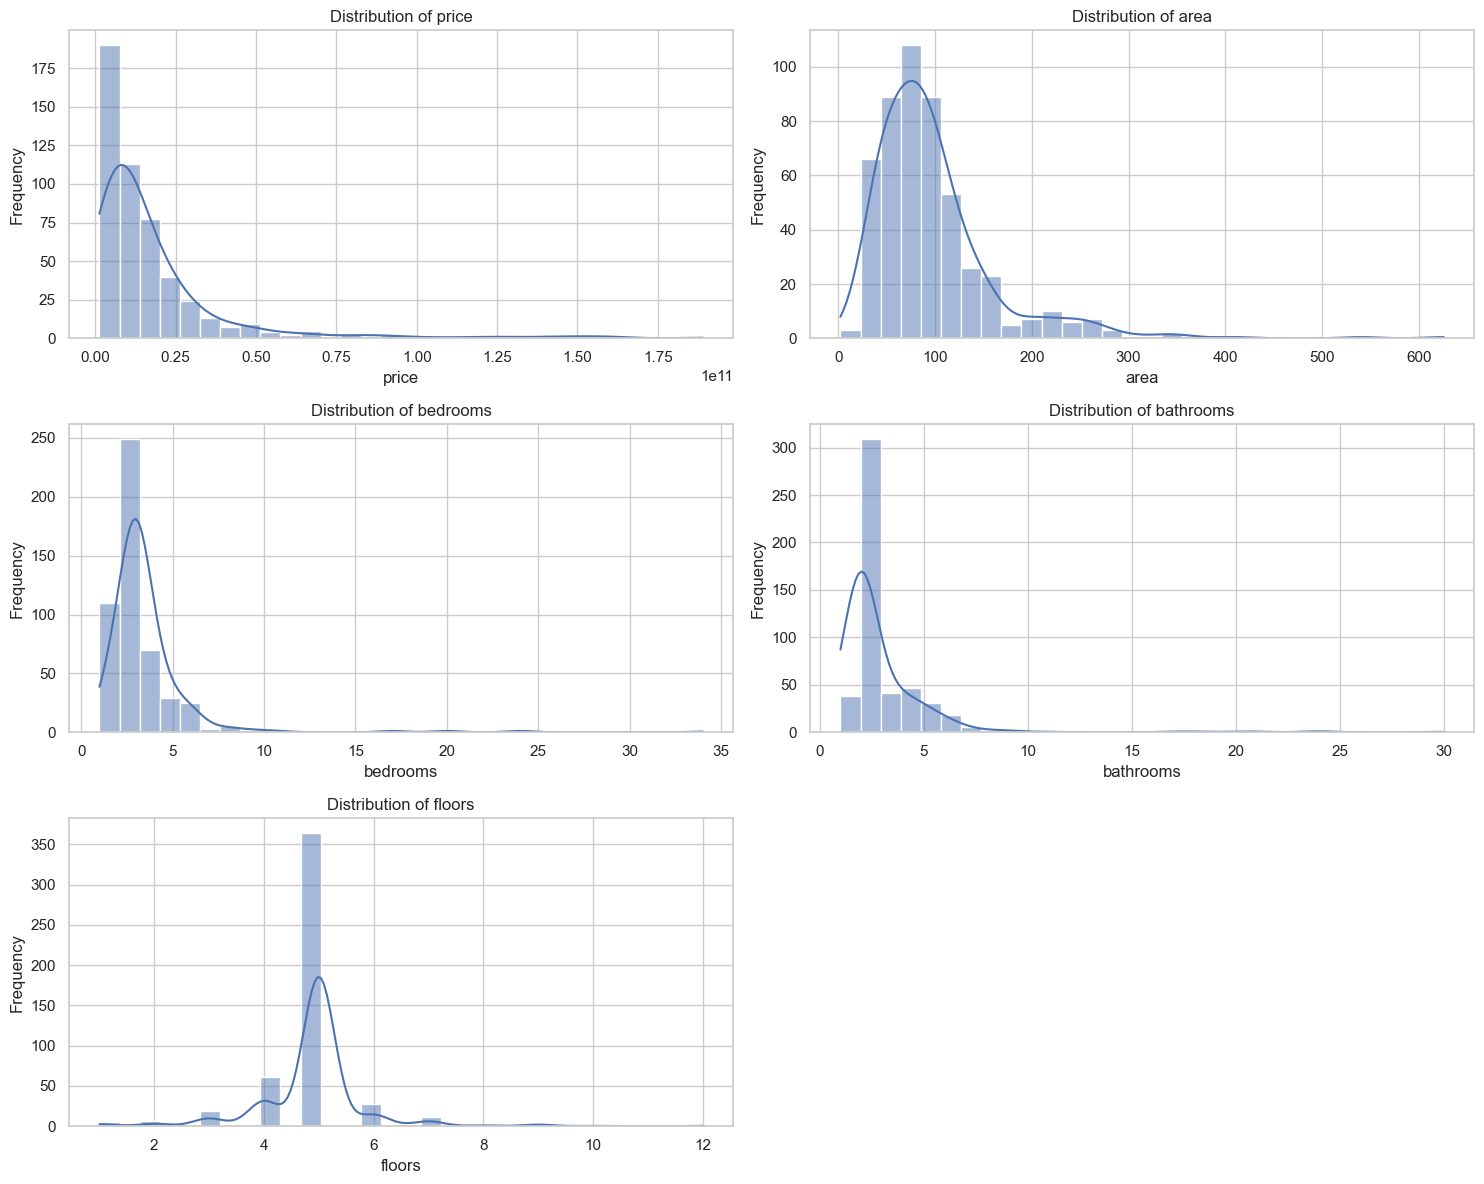

In [ ]:
# Setup
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Plotting
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'floors']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(len(numeric_cols), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

## Key Observations  

- The distribution of **price** is **right-skewed**, with a few extremely expensive properties.  
- The majority of properties are priced **under 20 to 25 billion VND**.  
  → A **log transformation** of `priceVnd` is needed to reduce variability and the impact of outliers.  
- The distribution of **area** is also **right-skewed**:  
  - Most properties fall between **40-150 m²**  
  - Some exceed **500 m²** → Consider removing outliers beyond the **99th percentile**.  
- Most properties have **2-5 bedrooms**, which aligns with typical housing patterns.  
- The distribution of **bathrooms** is similar, but some properties report **6-7+ bathrooms**, which should be **manually verified**.  
- Most properties have **1-5 floors**, though a few have **7+ floors**.  

# 2. Bivariate Analysis

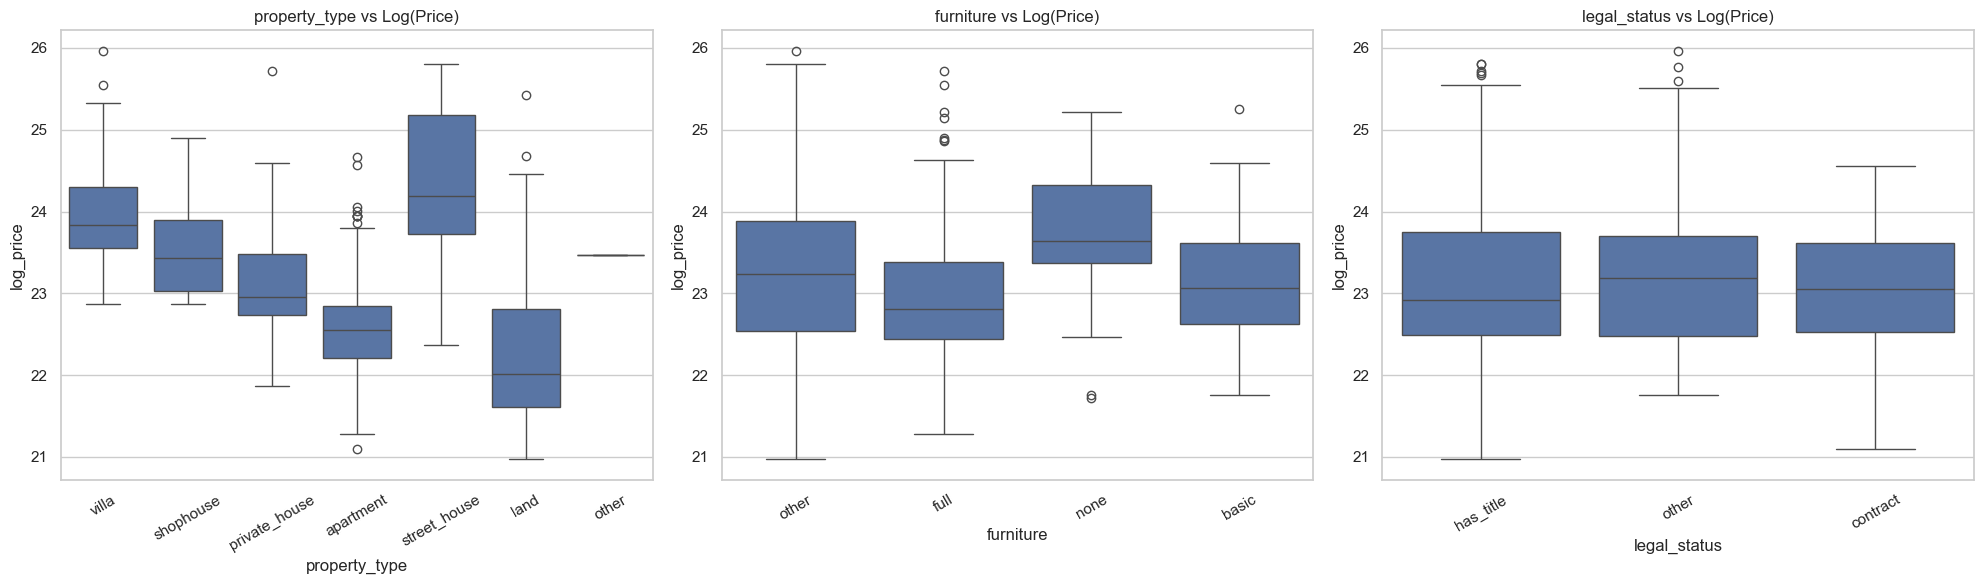

In [ ]:
# Box plotting categorical features
categorical_cols = ['property_type', 'furniture', 'legal_status']
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, col in enumerate(categorical_cols):
    sns.boxplot(data=df, x=col, y='log_price', ax=axes[i])
    axes[i].set_title(f'{col} vs Log(Price)')
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

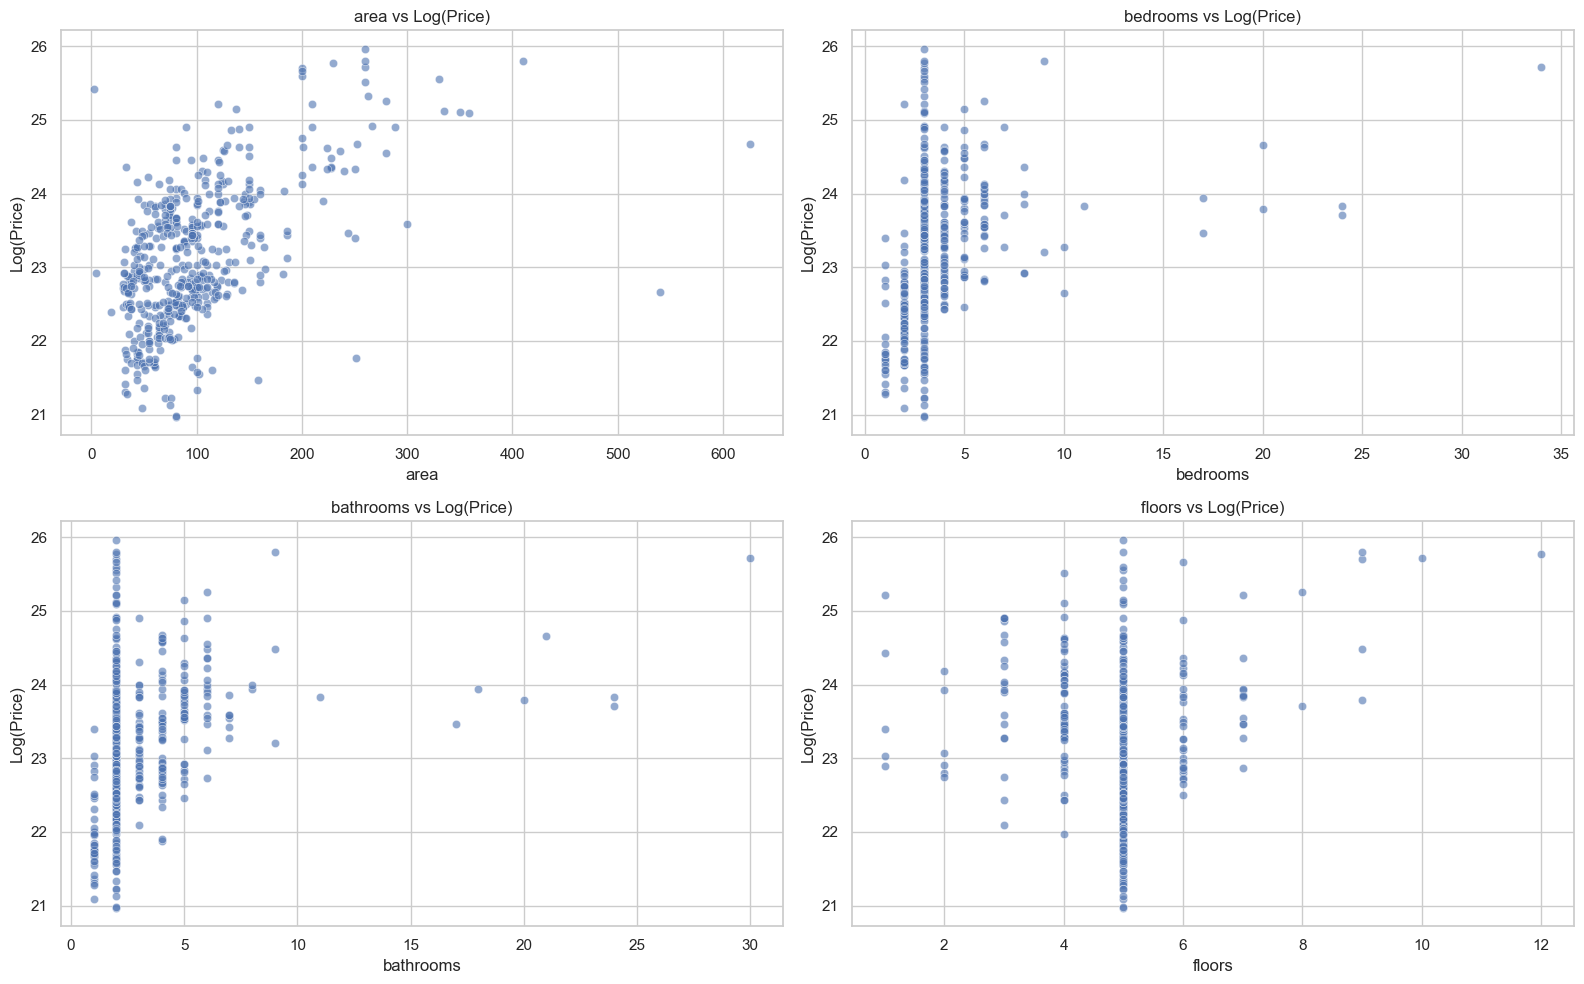

In [ ]:
# Scatter ploting numerical features
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'floors']
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.scatterplot(data=df, x=col, y='log_price', ax=axes[i], alpha=0.6)
    axes[i].set_title(f'{col} vs Log(Price)')
    axes[i].set_ylabel("Log(Price)")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

## Key Observations  

- Before visualizing price-related features, it is necessary to **apply a log transformation to `priceVnd`** and clean the corresponding features.  
  - This ensures that insights are more interpretable and the plots are visually clearer.  

- Although **area** has some outliers, it shows a **strong correlation with price**, making it an important feature.  

- For **bedrooms** and **bathrooms**, some entries report **unrealistic values (>20)**.  
  - These should be removed during preprocessing.  

- **Villas** and **landed houses** tend to be the most expensive property types.  

# 3. Correlation Matrix 

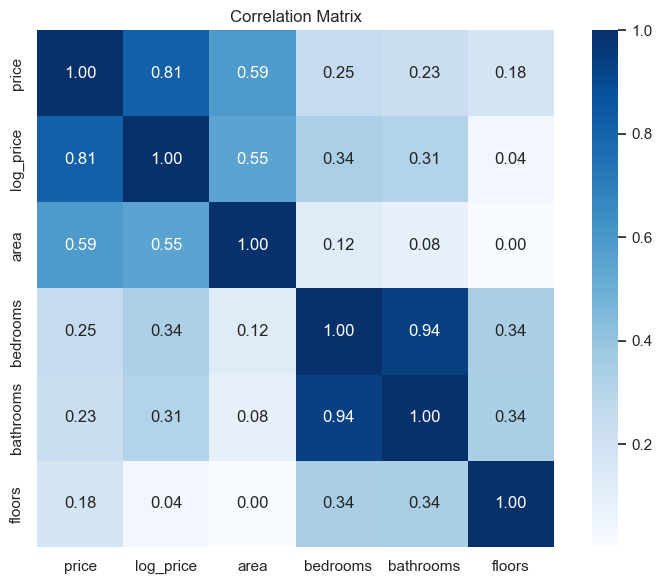

In [12]:
numeric_features = ['price', 'log_price', 'area', 'bedrooms', 'bathrooms', 'floors']
corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## Further Observations  

- The correlation between **price** and **log(price)** is **0.81**, indicating that the log transformation effectively **reduces variance** while still preserving the overall data pattern.  
  - Therefore, `log(priceVnd)` will be kept as the target variable for modeling.  

- Regarding the **independent features**:  
  - **Area**: Strongest predictor of price → consider applying a log transformation.  
  - **Bedrooms, Bathrooms, Floors**: Currently show **low contribution** to explaining variance in price.  
    - Further feature engineering or transformation may be required to improve their usefulness.  

# 4. Geographical Distribution

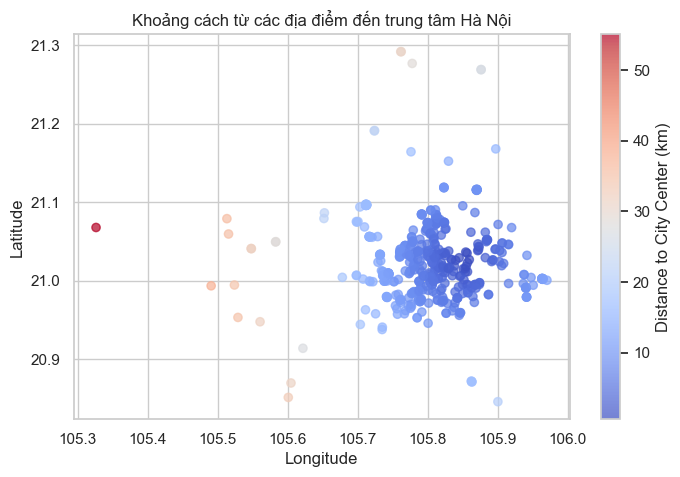

In [ ]:
# Plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(
    df['longitude'], df['latitude'],
    c=df['distance_to_center'], cmap='coolwarm', alpha=0.7
)
plt.colorbar(scatter, label='Distance to City Center (km)')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Khoảng cách từ các địa điểm đến trung tâm Hà Nội")
plt.grid(True)
plt.show()

## Geographical Insights  

- On the map visualization:  
  - **Blue points** represent properties located **closer to the city center**.  
  - **Orange/Red points** represent properties located **farther away**.  

- This indicates that the majority of properties are located within a **5–10 km radius** of Hoan Kiem (the city center).  

- A new feature, **`distance_to_center`**, should be added to the dataset.  
  - This feature will help the model better capture the effect of location on price.  

# Dataset after EDA

In [17]:
df.head()

,log_price,area,bedrooms,bathrooms,floors,latitude,longitude,property_type,furniture,legal_status,price,distance_to_center
0,23.362323,88,4,4,4.0,21.095906,105.711798,villa,other,has_title,1.400000e+10,16.574719
1,23.544645,96,3,2,4.0,21.096608,105.711918,villa,other,has_title,1.680000e+10,16.598702
2,23.035801,65,1,1,1.0,21.009765,105.743733,shophouse,other,has_title,1.010000e+10,11.669648
3,23.520547,96,3,2,5.0,21.096257,105.712943,villa,other,other,1.640000e+10,16.486178
4,23.550579,75,6,7,5.0,21.039330,105.872671,private_house,full,has_title,1.690000e+10,2.263692


In [18]:
df = df.drop(['latitude', 'longitude', 'price'], axis = 1)

In [19]:
df.head()

,log_price,area,bedrooms,bathrooms,floors,property_type,furniture,legal_status,distance_to_center
0,23.362323,88,4,4,4.0,villa,other,has_title,16.574719
1,23.544645,96,3,2,4.0,villa,other,has_title,16.598702
2,23.035801,65,1,1,1.0,shophouse,other,has_title,11.669648
3,23.520547,96,3,2,5.0,villa,other,other,16.486178
4,23.550579,75,6,7,5.0,private_house,full,has_title,2.263692


In [20]:
df.to_csv('data_for_model.csv')